In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.fft import fft, ifft

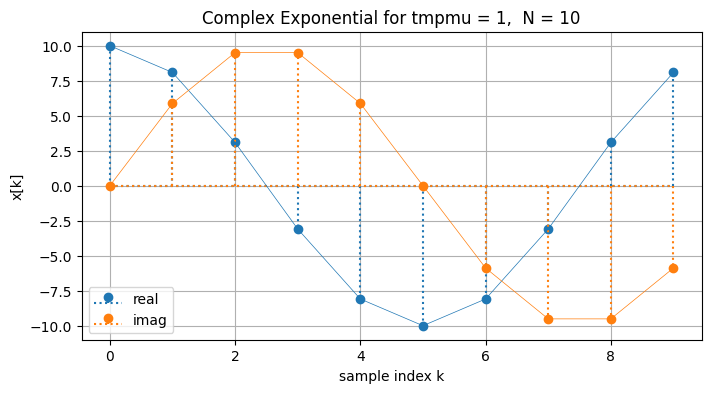

In [4]:
# parameters
N = 10                      # block length
k = np.arange(N)            # time/sample indices
A = 10                      # amplitude

# frequency parameter
tmpmu = 1       # one full period in N samples

# complex valued-input signal
# x[k] = A * exp(j * 2π/N * tmpmu * k)
x = A * np.exp(1j * 2 * np.pi * tmpmu / N * k)

# plot real and imagine parts
plt.figure(figsize=(8,4))

plt.stem(k, np.real(x), markerfmt='C0o',
         basefmt='C0:', linefmt='C0:', label='real')
plt.stem(k, np.imag(x), markerfmt='C1o',
         basefmt='C1:', linefmt='C1:', label='imag')

# optional: connect samples for visual clarity (not mathematically exact)
plt.plot(k, np.real(x), 'C0-', lw=0.5)
plt.plot(k, np.imag(x), 'C1-', lw=0.5)

plt.xlabel("sample index k")
plt.ylabel("x[k]")
plt.title(f"Complex Exponential for tmpmu = {tmpmu},  N = {N}")
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# DFT with For loops
X_ = np.zeros((N, 1), dtype=complex)  # allocate memory

for mu_ in range(N):                  # loop over frequency indices μ
    for k_ in range(N):               # loop over sample indices k
        X_[mu_] += x[k_] * np.exp(-1j * 2 * np.pi / N * k_ * mu_)

In [6]:
# IDFT with For loops
x_rec_ = np.zeros((N, 1), dtype=complex)

for k_ in range(N):                   # loop over time indices k
    for mu_ in range(N):              # loop over frequency indices μ
        x_rec_[k_] += X_[mu_] * np.exp(+1j * 2 * np.pi / N * k_ * mu_)

x_rec_ *= 1/N

In [8]:
# matrix-based DFT and IDFT

# all DFT frequency indices μ = 0 … N−1
mu = np.arange(N)

# build matrix of all products k*μ
K = np.outer(k, mu)

# Fourier matrix
W = np.exp(+1j * 2 * np.pi / N * K)

# DFT using matrix multiplication
X_matrix = W.conj().T @ x       # equivalent to summing x[k] e^{-j2π k μ /N}

# IDFT using matrix multiplication
x_reconstructed = (1/N) * (W @ X_matrix)

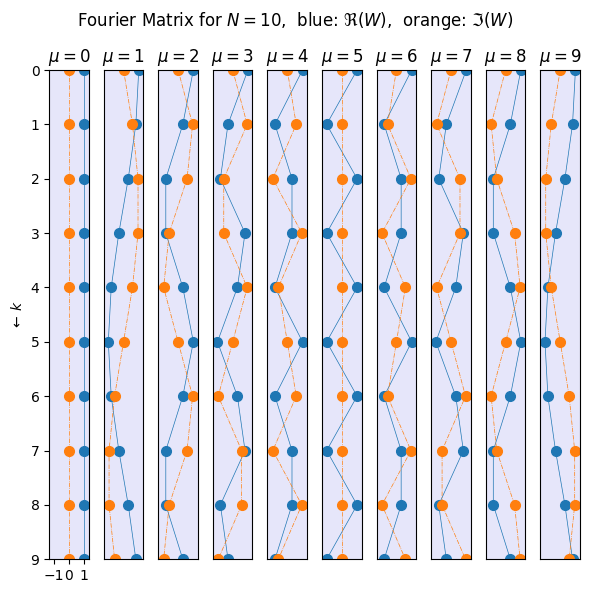

In [9]:
# visualization of the Fourier matrix W
fig, ax = plt.subplots(1, N)
fig.set_size_inches(6, 6)

fig.suptitle(
    r'Fourier Matrix for $N=%d$,  blue: $\Re(W)$,  orange: $\Im(W)$' % N
)

for tmp in range(N):
    ax[tmp].set_facecolor('lavender')

    # plot column tmp of the Fourier matrix versus k (rows)
    ax[tmp].plot(W[:, tmp].real, k, 'C0o-', ms=7, lw=0.5)
    ax[tmp].plot(W[:, tmp].imag, k, 'C1o-.', ms=7, lw=0.5)

    ax[tmp].set_ylim(N-1, 0)          # invert y-axis to show k increasing downward
    ax[tmp].set_xlim(-1.3, 1.3)

    if tmp == 0:
        ax[tmp].set_yticks(np.arange(0, N))
        ax[tmp].set_xticks(np.arange(-1, 2, 1))
        ax[tmp].set_ylabel(r'$\leftarrow\, k$')
    else:
        ax[tmp].set_yticks([])
        ax[tmp].set_xticks([])

    ax[tmp].set_title(r'$\mu=%d$' % tmp)

fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

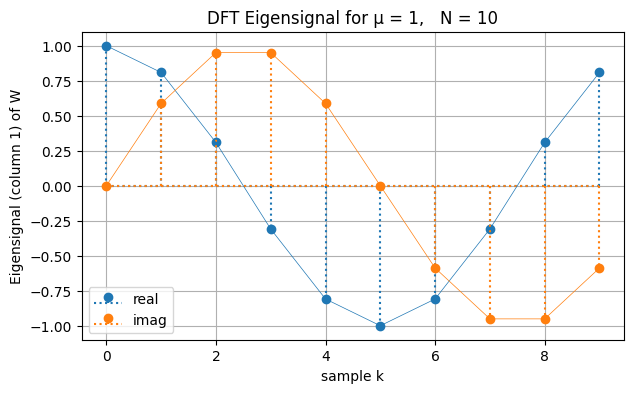

In [10]:
# choose the eigenfrequency index to visualize
tmpmu = 1   # for example: μ = 1

plt.figure(figsize=(7,4))

# real and imaginary parts of the μ-th eigensignal (μ-th column of W)
plt.stem(k, np.real(W[:, tmpmu]), label='real',
         markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.stem(k, np.imag(W[:, tmpmu]), label='imag',
         markerfmt='C1o', basefmt='C1:', linefmt='C1:')

# optional line connection for visual clarity
plt.plot(k, np.real(W[:, tmpmu]), 'C0-', lw=0.5)
plt.plot(k, np.imag(W[:, tmpmu]), 'C1-', lw=0.5)

plt.xlabel("sample k")
plt.ylabel(f"Eigensignal (column {tmpmu}) of W")
plt.title(f"DFT Eigensignal for μ = {tmpmu},   N = {N}")
plt.grid(True)
plt.legend()
plt.show()


In [11]:
# check orthogonality of eigensignals (columns of W)

# inner product of the same eigensignal (should be N)
inner_same = np.vdot(W[:, 0], W[:, 0])
print("Inner product (μ=0 with μ=0):", inner_same)

# inner product of two different eigensignals (should be ~0)
inner_diff = np.vdot(W[:, 0], W[:, 1])
print("Inner product (μ=0 with μ=1):", inner_diff)

Inner product (μ=0 with μ=0): (10+0j)
Inner product (μ=0 with μ=1): (-3.3306690738754696e-16+0j)


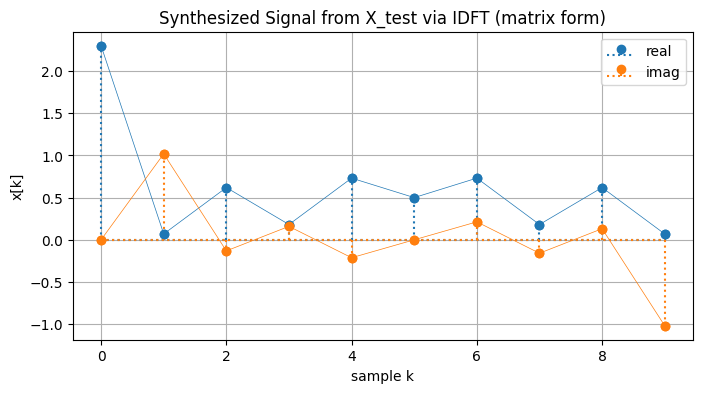

Matches numpy.ifft(): True
Mean value (DC component): (0.6000000000000001+6.66133814775094e-17j)


In [12]:
# IDFT synthesis for N = 10

if N == 10:
    X_test = np.array([6, 2, 4, 3, 4, 4, 0, 0, 0, 0], dtype=complex)

    # IDFT using matrix multiplication
    x_test = (1/N) * np.matmul(W, X_test)

    # plot synthesized signal
    plt.figure(figsize=(8,4))
    plt.stem(k, np.real(x_test), label='real',
             markerfmt='C0o', basefmt='C0:', linefmt='C0:')
    plt.stem(k, np.imag(x_test), label='imag',
             markerfmt='C1o', basefmt='C1:', linefmt='C1:')

    # optional connection for visibility
    plt.plot(k, np.real(x_test), 'C0o-', lw=0.5)
    plt.plot(k, np.imag(x_test), 'C1o-', lw=0.5)

    plt.xlabel("sample k")
    plt.ylabel("x[k]")
    plt.title("Synthesized Signal from X_test via IDFT (matrix form)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # verify with numpy's ifft
    print("Matches numpy.ifft():", np.allclose(np.fft.ifft(X_test), x_test))

    # check DC component
    print("Mean value (DC component):", np.mean(x_test))

In [13]:
# linear combination interpretation of the IDFT

if N == 10:
    # manually reconstruct using only nonzero coefficients
    x_test2 = (X_test[0] * W[:, 0] +
               X_test[1] * W[:, 1] +
               X_test[2] * W[:, 2] +
               X_test[3] * W[:, 3] +
               X_test[4] * W[:, 4] +
               X_test[5] * W[:, 5])

    # normalize for IDFT
    x_test2 *= (1/N)

    # check consistency with earlier result
    print("Manual reconstruction matches matrix IDFT:",
          np.allclose(x_test, x_test2))

Manual reconstruction matches matrix IDFT: True


In [14]:
if N == 10:
    # DFT using matrix multiplication: X = W* conjugate times x
    X_test2 = np.matmul(np.conj(W), x_test)

    print("Matrix DFT matches original X_test:", np.allclose(X_test, X_test2))

if N == 10:
    # Compare with numpy's FFT routine
    print("numpy.fft.fft matches original:", np.allclose(np.fft.fft(x_test), X_test))

Matrix DFT matches original X_test: True
numpy.fft.fft matches original: True


In [15]:
if N == 10:
    print("X[0] =", np.conj(W[:, 0]) @ x_test)
    print("X[1] =", np.conj(W[:, 1]) @ x_test)
    print("X[2] =", np.conj(W[:, 2]) @ x_test)
    print("X[3] =", np.conj(W[:, 3]) @ x_test)
    print("X[4] =", np.conj(W[:, 4]) @ x_test)
    print("X[5] =", np.conj(W[:, 5]) @ x_test)
    # remaining columns produce zero

X[0] = (6.000000000000001+4.440892098500626e-16j)
X[1] = (1.9999999999999996+3.608224830031759e-16j)
X[2] = (4+3.0531133177191805e-16j)
X[3] = (2.9999999999999996-2.7755575615628914e-16j)
X[4] = (4-3.677613769070831e-16j)
X[5] = (3.9999999999999996-9.574516650500306e-16j)


In [17]:
X = fft(x)

# check that matrix-based DFT matches numpy's FFT
print(np.allclose(np.matmul(np.conj(W), x), X))

True


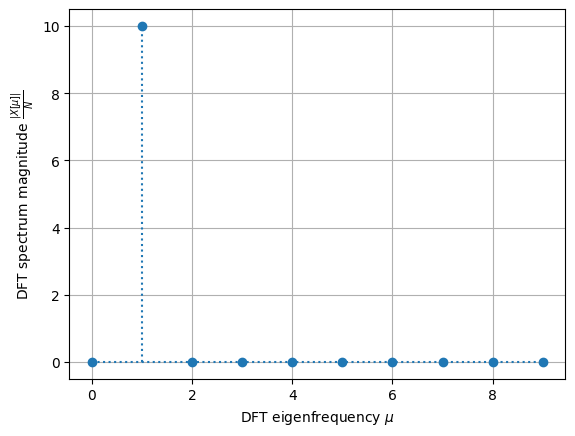

In [18]:
plt.stem(mu, np.abs(X)/N, markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.xlabel(r'DFT eigenfrequency $\mu$')
plt.ylabel(r'DFT spectrum magnitude $\frac{|X[\mu]|}{N}$')
plt.grid(True)